# 年级预测 
分为按照观看视频做习题的行为特征建模，利用班级信息建模两种预测方式，班级信息建模精度略高，但效果不稳定

1.行为信息建模
利用用户在6月份观看各年级视频数量，做各年级习题数量，和观看各年级视频的平均进度特征进行建模

In [27]:
#载入相关库
import pandas as pd
import numpy as np

import matplotlib.pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.model_selection import train_test_split
import warnings
import os
warnings.filterwarnings("ignore")
#读入数据
def loaddata(path=''):
    tmp=[]
    with open(str(path)+'pred.csv') as f:
        for line in f.readlines():
            line_1=line.strip() 
            line_1=line_1.split("\t")
            line_1=list(map(lambda x: np.nan if x=='NULL' else x,line_1))
            tmp.append(line_1)
        
    return pd.DataFrame(tmp)
df=loaddata()
#加上列名
df.columns=['user_id','problem_count_grade7','problem_count_grade8','problem_count_grade9',
            'problem_count_other','video_count_grade7','video_count_grade8','video_count_grade9',
            'video_avg_progress_grade7','video_avg_progress_grade8','video_avg_progress_grade9',
            'video_avg_progress_show','registered grade','u_phone'          
            ]
del df['registered grade']
df.index=df['user_id'] #以下所有pandas数据集，索引固定为user ID
#载入修正后的registered grade
target=pd.read_csv('school_year.csv')
target['jr_usr.school_year']=target['jr_usr.school_year'].map(lambda x : '其他' if x not in ['七年级', '八年级', '九年级'] else x )
target.columns=['user_id','registered grade']
target.index=target['user_id']

df=pd.merge(df,target,on='user_id',how='left')

df.index=df['user_id']
#label编号
df['registered grade'] =df['registered grade'].map(lambda x : '其他' if x not in ['七年级', '八年级', '九年级'] else x )
df['registered grade'].replace({'七年级':0,'八年级':1,'九年级':2,'其他':3},inplace=True)#将字符转变为数值
df.head()

,user_id,problem_count_grade7,problem_count_grade8,problem_count_grade9,problem_count_other,video_count_grade7,video_count_grade8,video_count_grade9,video_avg_progress_grade7,video_avg_progress_grade8,video_avg_progress_grade9,video_avg_progress_show,u_phone,registered grade
user_id,,,,,,,,,,,,,,
55b06ed58095d47f4741b4be,55b06ed58095d47f4741b4be,NaN,NaN,NaN,NaN,0,3,1,0.0,0.09783545031748796,0.0036309238522649707,0.0,13483246880,3
55bece6ad21c49625f83772c,55bece6ad21c49625f83772c,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0,13966162406,3
55ca072f2dcfc52c747508df,55ca072f2dcfc52c747508df,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0,NaN,2
55f01078350fa8782213b92e,55f01078350fa8782213b92e,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0,13986932876,3
55f2c482af3c1dcb75b93ede,55f2c482af3c1dcb75b93ede,0,19,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,3


## EDA 

相较于八年级,九年级特征区分度略低

绘制7年级练习
绘制7年级视频
绘制8年级练习
绘制8年级视频
绘制9年级练习
绘制9年级视频


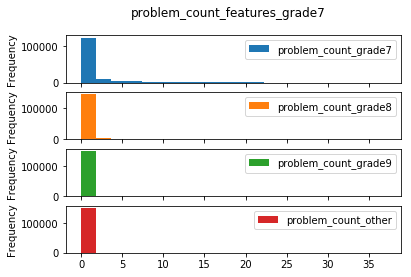

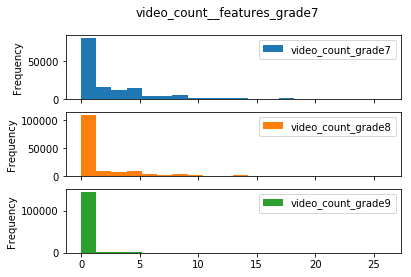

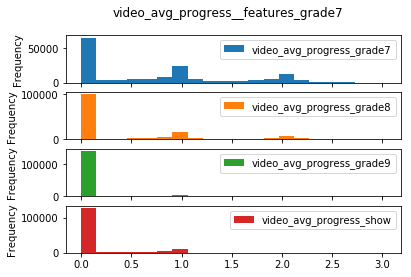

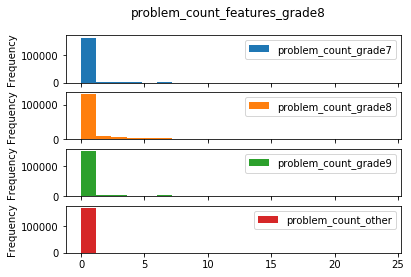

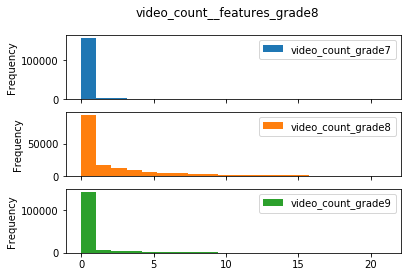

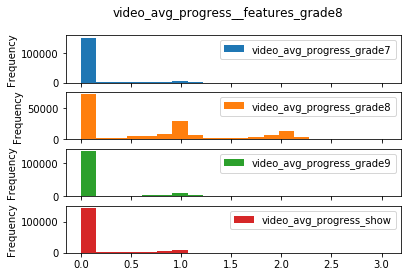

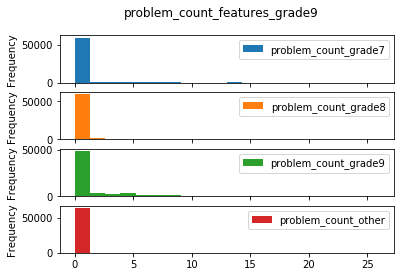

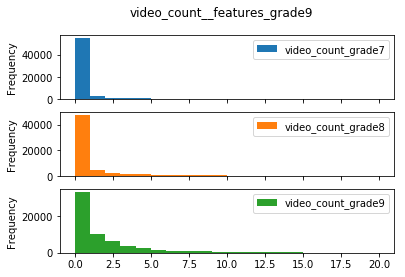

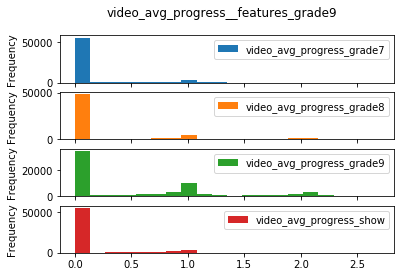

In [28]:

#EDA
for i in list(df.columns[1:-2]):
    df[i]=df[i].astype(float)
    df[i]=df[i].fillna(0)

##绘制各注册年级标签下的变量取值直方图分布情况
def truehist(data,title):
    a=[]
    for i in data.columns.tolist():    
        mean=data[i].mean()
        std=data[i].std()
        tmp=data[i][data[i]<mean+3*std]
        a.append(tmp)
    a=pd.DataFrame(a).T
    a.plot.hist(stacked= True,bins=20,title=title,subplots=True)
for i in [0, 1,2]:

    tmp1=df[['problem_count_grade7','problem_count_grade8','problem_count_grade9',
            'problem_count_other']][df['registered grade']==i]
    print('绘制'+str(i+7)+'年级练习')
    truehist(tmp1,'problem_count_features_grade'+str(i+7))
    
    tmp2=df[['video_count_grade7','video_count_grade8','video_count_grade9']][df['registered grade']==i]
    print('绘制'+str(i+7)+'年级视频')
    truehist(tmp2,'video_count__features_grade'+str(i+7))
    tmp3=df[['video_avg_progress_grade7','video_avg_progress_grade8','video_avg_progress_grade9',
            'video_avg_progress_show']][df['registered grade']==i]
    truehist(tmp3,'video_avg_progress__features_grade'+str(i+7))

## 特征工程
特征衍生 

构造交叉特征 count0，用户取值为0的特征数，反应用户活跃程度 

构造problem和video计数交叉特征，各年级视频/习题计数处以总视频/习题计数

In [29]:
#构造交叉特征
df=df[df['registered grade'].isin([0,1,2])]

def createnewfeature():
    #用户取值为0的特征数
    df['count0']=df[df.columns.tolist()[1:-2]].apply(lambda x :sum(x==0),axis=1)
    #加入eps:0.00001的意义是防止分母为0的报错
    problemcol= list(filter(lambda x:'problem' in x,df.columns))
    for i in problemcol:        
        df[i+'_f1']=df[i]/df[problemcol].apply(sum,axis=1)+0.000001
        df[i+'_f1'].fillna(0,inplace=True)
    videocol= list(filter(lambda x:'video_count' in x,df.columns))
    for i in videocol:   
        df[i+'_f1']=df[i]/df[videocol].apply(sum,axis=1)+0.000001
        df[i+'_f1'].fillna(0,inplace=True)

createnewfeature()

## 行为特征建模
选取 count0特征取值小于等于10的用户，即排除掉不活跃用户，通过xgboost获得子叶节点的特征信息（300维），再将xgboost子叶节点特征进行one-hot转换，转换为稀疏矩阵，最后用logistic 回归进行建模

In [30]:
df_1=df[df['count0']<=10]
x=df_1.drop(['user_id','registered grade','u_phone','registered grade'], axis=1)
y=df_1['registered grade']

#划分训练集验证集
X_train, X_test, y_train, y_test = train_test_split(
                x, y, test_size=0.2, random_state=0)

import xgboost as xgb
xgclf=xgb.XGBClassifier()

xgclf.fit(X_train,y_train)
#提取子叶节点的特征
feature_train=xgclf.apply(X_train)
feature_test=xgclf.apply(X_test)
feature_train=pd.DataFrame(feature_train)
feature_test=pd.DataFrame(feature_test)
#one-hot稀疏矩阵
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(feature_train)
feature_train=enc.transform(feature_train)
feature_test=enc.transform(feature_test)
#LR
lr= LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr.fit(feature_train,y_train)
y_pred=lr.predict(feature_test)
result=classification_report(y_pred,y_test)
print(result)

             precision    recall  f1-score   support

          0       0.71      0.79      0.75     26028
          1       0.77      0.64      0.70     33882
          2       0.40      0.55      0.46      7401

avg / total       0.71      0.69      0.70     67311



## 班级集群进行预测
用样本用户对应的班级中，和该样本用户处于同一班级的其他样本用户中的出现频率最大的注册年级进行预测  
出现频率最大注册年级的判定条件：样本用户对应年级中的样本用户数大于3，且出现注册年级最大的频数大于总样本用户数的60%

In [51]:
'''
'user_rooms1.csv' 获取样本用户中的所属的班级列表,ls_8_6为样本数据临时表
对应SQL code

SELECT a.user_id as user_id,b.rooms as rooms
FROM tmp.ls_8_6 AS a LEFT JOIN tmp.users_tmp_20180805 as b
on user_id=b.id

'rooms.csv' 每个班级的基本信息

对应SQL code
SELECT id,members
FROM onions.rooms    
'''
data_r=df[['user_id','registered grade']]
r=dict(zip(data_r['user_id'].tolist(),data_r['registered grade'].tolist()))#用户id to 注册年级字典

rooms=pd.read_csv('rooms.csv')
rooms=rooms[['id','members']]

user_rooms=pd.read_csv('user_rooms1.csv')
data_r=pd.merge(data_r,user_rooms,on='user_id',how='left')


global null #members字段中会出现null,为了将字段中的字符串传化成列表，将null变为全局变量
null=''
rooms['members']=rooms['members'].apply(lambda x: eval(x))
data_r.dropna(inplace=True)
data_r=data_r[data_r['registered grade']<3]
data_r['rooms']=data_r['rooms'].apply(lambda x: eval(x))

'''
临时函数 q,ql
用于将rooms表格里的members成员的用户id转化为注册年级

'''
def q(x):
    try :
        return r[x]
    except KeyError as e:
        return  -1
def ql(x):
       return list(map(q,x))



rooms['members_grade']=rooms['members'].map(ql)
rooms['members_grade']=rooms['members_grade'].map(lambda y:list(filter (lambda x:x!=-1,y)))


#给出班级集群预测的年级
def getgrade(x):
    if len(x)>3 and Counter(x).most_common(1)[0][1]>=0.8*len(x):
        return Counter(x).most_common(1)[0][0]
    else :
        return 
    
rooms['members_grade']=rooms['members_grade'].map(getgrade)
rooms=rooms.dropna()

rd=dict(zip(rooms['id'].tolist(),rooms['members_grade'].tolist()))#rooms id to 最大概率注册年级字典
def predict(x):
    tmp=[]
    for i in  range(len(x)):
        try:
            tmp.append(rd[x[i]])
        except KeyError as e:
            continue
    return tmp
data_r['pred_by_rooms_grade']=data_r['rooms'].map(predict)

#一个用户存在过多个rooms，用最高的年级数作为预测年级
data_r['pred_by_rooms_grade']=data_r['pred_by_rooms_grade'].map(lambda x:max(x) if x else np.nan)


data_rf=data_r[data_r['pred_by_rooms_grade'].notnull()]
  
b=classification_report(data_rf['registered grade'],data_rf['pred_by_rooms_grade'])
print(b)  


             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      5046
        1.0       0.96      0.94      0.95      3749
        2.0       0.92      0.34      0.49       200
        3.0       0.00      0.00      0.00         0

avg / total       0.96      0.95      0.95      8995

